In [3]:
'''
File name: preprocessing.ipynb
Authors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt
Date created: 04/11/2022
Date last modified: 14/12/2022
Python version: 3.8.8
'''

'\nFile name: preprocessing.ipynb\nAuthors: Yasmin El Euch, Aliénor Bénédicte G Hamoir, Clara Rossignol, Guillaume David E. Ryelandt\nDate created: 04/11/2022\nDate last modified: 14/12/2022\nPython version: 3.8.8\n'

---
## General Information <a id="GI"> </a> 

### Folder structure <a id="Folder"> </a>


### Imports <a id="Imports"> </a>

***Libraries used for milestone 2:***


In [4]:
#Imports used in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import t


### Paths <a id="Paths"> </a>

Required to adapt those path to local file organization

In [5]:
### PATHs for dataset:
PATH_DATA = 'data/'

#additionnal datasets:
PATH_MOVIE_OSCAR_NOMINEES = PATH_DATA+'oscar_nominees.csv'
PATH_MOVIE_OSCAR_WINNERS = PATH_DATA+'oscar_nom_win.csv'

---
##  Data scraping, pre-processing and dataset construction<a id="Step-1"> </a>

## Oscars NOMINEES

### Pre-processing <a id="#Pre-pro"> </a>
> basic sanity checks 

In [6]:
print("Reading in movie data")

#Read in movie metadata, plot summaries, and character metadata.

oscar_nominees=pd.read_csv(PATH_MOVIE_OSCAR_NOMINEES,header=0)
oscar_nominees=oscar_nominees.sort_values(by='year',ascending=True)
oscar_nominees['dups_nominees'] = oscar_nominees.duplicated()
oscar_nominees

Reading in movie data


,name,gender,category,year,dups_nominees
3294,William Cameron Menzies,male,Production Design,1929,False
2031,Karl Struss,male,Cinematography,1929,False
3192,Harry Oliver,male,Production Design,1929,False
2478,Rochus Gliese,male,Production Design,1929,False
1586,George Barnes,male,Cinematography,1929,False
...,...,...,...,...,...
4488,Matthew Wood,male,Sound Editing,2018,False
4268,Patrick Tubach,male,Visual Effects,2019,False
1733,Yorgos Lanthimos,male,Director,2019,False
7360,Guy Nattiv,male,Live Action Short Film,2019,False


In [7]:
print('there are nominees in the dataset',len(oscar_nominees))

there are nominees in the dataset 9599


In [8]:
oscar_nominees.name.is_unique

False

In [9]:
oscar_nominees.isna().any()

name             False
gender            True
category         False
year             False
dups_nominees    False
dtype: bool

In [10]:
#check if any NaN features

print('Number of NaN in each features for the genders:',oscar_nominees['gender'].isna().sum())

Number of NaN in each features for the genders: 29


In [11]:
oscar_nominees.category.unique()

array(['Production Design', 'Cinematography',
       'Writing, Adapted Screenplay', 'Story', 'Director', 'Sound Mixing',
       'Animated Short Film', 'Score, Adaptation or Treatment',
       'Film Editing', 'Live Action Short Film, One-Reel',
       'Original Score', 'Cinematography, Black-and-White',
       'Cinematography, Color', 'Special Effects',
       'Art Direction, Black and White', 'Art Direction, Color',
       'Writing, Original Screenplay', 'Original Dramatic Score',
       'Original Musical Score', 'Original Dramatic or Comedy Score',
       'Documentary Feature', 'Live Action Short Film, Two-Reel',
       'Documentary (Short Subject)', 'Costume Design, Black-and-White',
       'Costume Design, Color', 'Foreign Language Film', 'Costume Design',
       'Live Action Short Film', 'Visual Effects', 'Sound Editing',
       'Original Song', 'Makeup and Hairstyling', 'Animated Feature'],
      dtype=object)

>as we can see some categories are written in a slightly different way, the following procedure might a little bit inefficient but it is the best we could find


### first exploration of the dataset <a id="#explo"> </a>
>

In [12]:
oscar_nominees.gender.value_counts()

male          8544
female        1025
non-binary       1
Name: gender, dtype: int64

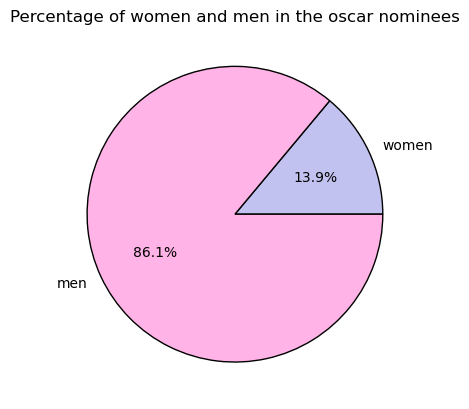

In [13]:
#vizualisation 
#number of female nominees compared to male nominees
fem_nominees = oscar_nominees[oscar_nominees['gender'] == 'female']
man_nominees = oscar_nominees[oscar_nominees['gender'] == 'male']

plt.pie(np.array([fem_nominees['name'].nunique(),man_nominees['name'].nunique()]),labels=['women','men'],colors = ['#c2c2f0','#ffb3e6'],autopct='%1.1f%%',   wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.title('Percentage of women and men in the oscar nominees')
plt.show()

## TODO ajouter des tests statistiques 

In [ ]:
#separate by gender 
oscar_nominees_males=oscar_nominees[oscar_nominees['gender']=='male']
oscar_nominees_females=oscar_nominees[oscar_nominees['gender']=='female']
oscar_nominees_non_binary=oscar_nominees[oscar_nominees['gender']=='non-binary']

#sanity checks 
len(oscar_nominees_males)+len(oscar_nominees_females)+oscar_nominees['gender'].isna().sum()+len(oscar_nominees_non_binary)==len(oscar_nominees)

True

### Number of women per categories <a id="#explo"> </a>

>The goal is to check if there is a gender gap in the jobs of the movie industry. A new dataframe is created in order to see the number of men and women that have been nominated over the years.

In [ ]:
oscar_nominees_count=oscar_nominees.category.value_counts().to_frame().rename(columns={"category": "total"})
oscar_nominees_count_female=oscar_nominees_females.category.value_counts().to_frame().rename(columns={"category": "females"})
oscar_nominees_count_male=oscar_nominees_males.category.value_counts().to_frame().rename(columns={"category": "males"})
oscar_nominees_count=pd.concat([oscar_nominees_count,oscar_nominees_count_female,oscar_nominees_count_male,],axis=1)
oscar_nominees_count


,total,females,males
Sound Mixing,1049,15.0,1034
Production Design,731,140.0,591
"Writing, Adapted Screenplay",661,69.0,592
"Writing, Original Screenplay",623,59.0,564
Film Editing,542,77.0,465
Visual Effects,503,3.0,496
Director,442,5.0,437
Animated Short Film,425,41.0,382
Documentary (Short Subject),411,113.0,286
"Art Direction, Black and White",380,7.0,373


In [ ]:
#The 2 last rows are deleted, 
oscar_nominees_count.drop(oscar_nominees_count.tail(2).index, inplace = True)


Text(0.5, 1.0, 'Number of nominees in each category by genres')

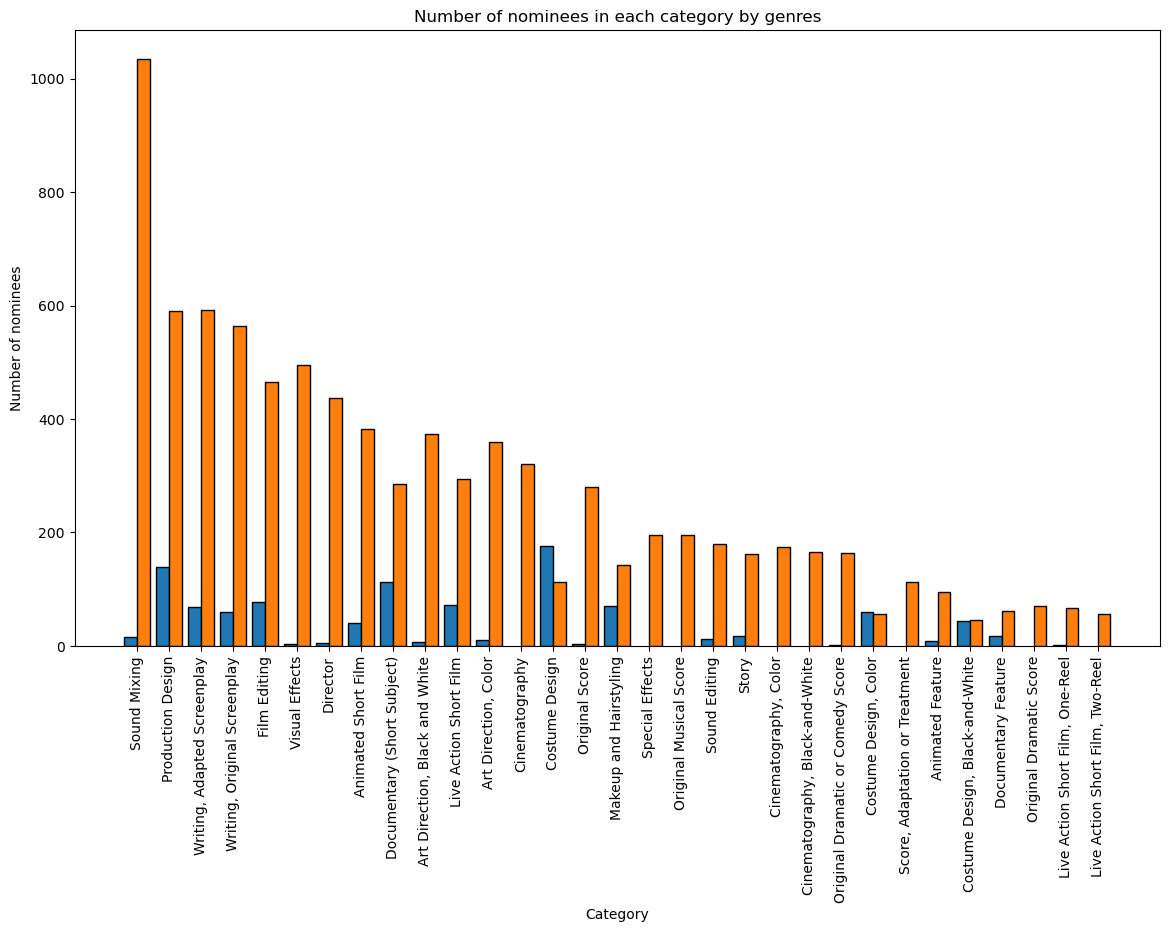

In [ ]:
X_axis = np.arange(len(oscar_nominees_count))

plt.figure(figsize=(14,8))
plt.bar(X_axis - 0.2, oscar_nominees_count.females, 0.4, label = 'females',edgecolor = 'black')
plt.bar(X_axis + 0.2,oscar_nominees_count.males, 0.4, label = 'males',edgecolor = 'black')

 
plt.xticks(X_axis, oscar_nominees_count.index,rotation=90)
plt.xlabel("Category")
#plt.yscale('log')
plt.ylabel("Number of nominees")
plt.title("Number of nominees in each category by genres")


> The data indicates that there is a potential gender bias in the movie industry, as the number of male and female nominees in many categories is not balanced. This gender gap is a significant issue that needs to be further studied and addressed in order to promote diversity and equality in the industry. It is important to monitor whether this gap has evolved over time. 

## Number of nominees over the years <a id="#explo"> </a>
> To determine whether there has been any evolution in the gender gap in the movie industry over time, we will need to analyze the evolution of nominees among all categories over the years. This will help us identify any trends or changes in the representation of male and female nominees, and allow us to evaluate whether progress has been made in promoting gender equality in the movie industry.

In [ ]:
oscar_nominees_evol=oscar_nominees.year.value_counts().to_frame().rename(columns={"year": "total"})
oscar_nominees_evol_female=oscar_nominees_females.year.value_counts().to_frame().rename(columns={"year": "females"})
oscar_nominees_evol_male=oscar_nominees_males.year.value_counts().to_frame().rename(columns={"year": "males"})
oscar_nominees_evol=pd.concat([oscar_nominees_evol,oscar_nominees_evol_female,oscar_nominees_evol_male,],axis=1).sort_index(ascending=True).fillna(0)
oscar_nominees_evol.tail()

,total,females,males
2015,138,23.0,115
2016,153,31.0,121
2017,122,21.0,101
2018,8,1.0,7
2019,4,1.0,3


Text(0.5, 1.0, 'Number of nominees in all categories over the years by genres')

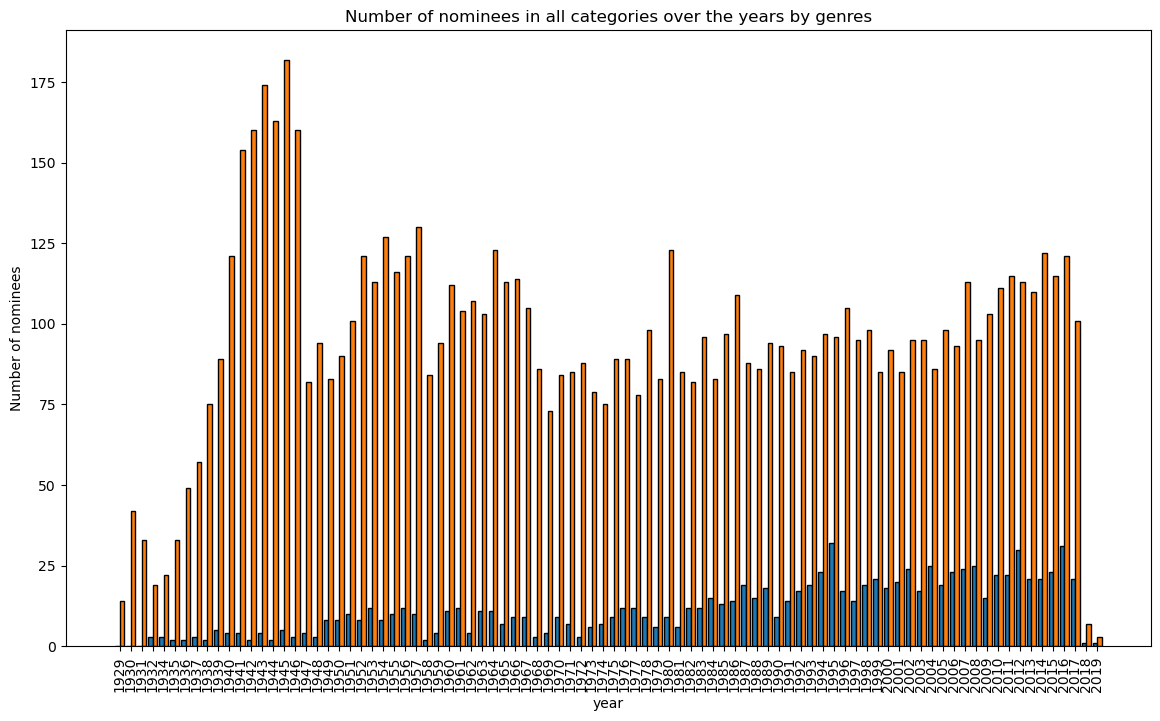

In [ ]:
X_axis = np.arange(len(oscar_nominees_evol))

plt.figure(figsize=(14,8))
#plt.bar(X_axis - 0.2, oscar_nominees_evol.females/oscar_nominees_evol.total, 0.4, label = 'females',edgecolor = 'black')
#plt.bar(X_axis + 0.2,oscar_nominees_evol.males/oscar_nominees_evol.total, 0.4, label = 'males',edgecolor = 'black')
plt.bar(X_axis - 0.2, oscar_nominees_evol.females, 0.4, label = 'females',edgecolor = 'black')
plt.bar(X_axis + 0.2,oscar_nominees_evol.males, 0.4, label = 'males',edgecolor = 'black')
 
plt.xticks(X_axis, oscar_nominees_evol.index,rotation=90)
plt.xlabel("year")
#plt.yscale('log')
plt.ylabel("Number of nominees")
plt.title("Number of nominees in all categories over the years by genres")

>The bar chart above shows the relative proportions of men and women nominated in all categories over the years. As we can see, the last two years have significantly fewer nominees compared to previous years, so we will exclude them from our analysis.

In [ ]:
oscar_nominees_evol.drop(oscar_nominees_evol.tail(2).index, inplace = True)
oscar_nominees_evol

,total,females,males
1929,14,0.0,14
1930,42,0.0,42
1931,33,0.0,33
1932,22,3.0,19
1934,25,3.0,22
...,...,...,...
2013,131,21.0,110
2014,143,21.0,122
2015,138,23.0,115
2016,153,31.0,121


> We will now conduct a regression analysis to determine if there has been a change in the proportion of women nominated among all categories over the years. 

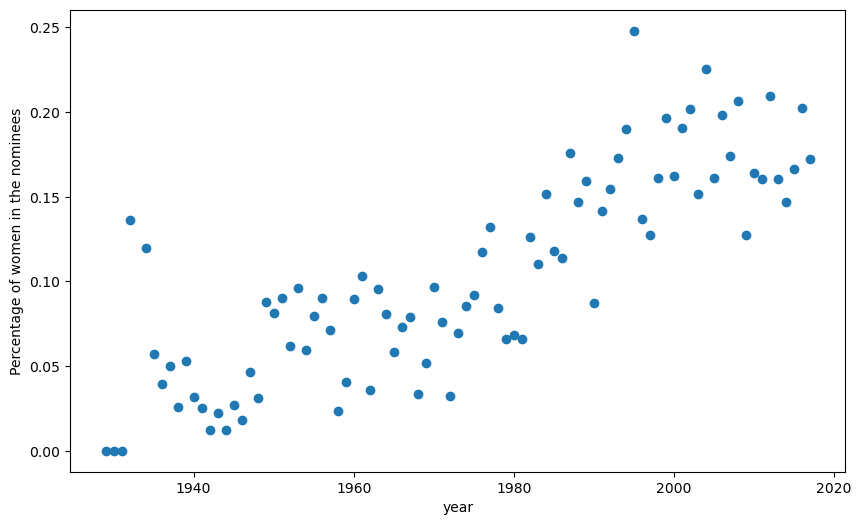

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(oscar_nominees_evol.index,oscar_nominees_evol.females/oscar_nominees_evol.total)
plt.xlabel("year")
plt.ylabel("Percentage of women in the nominees")
plt.show()

In [ ]:
#perform a linear regression 
X = oscar_nominees_evol.index  
Y =oscar_nominees_evol.females/oscar_nominees_evol.total
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     194.3
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           8.79e-24
Time:                        16:21:24   Log-Likelihood:                 173.45
No. Observations:                  88   AIC:                            -342.9
Df Residuals:                      86   BIC:                            -337.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8221      0.282    -13.573      0.0

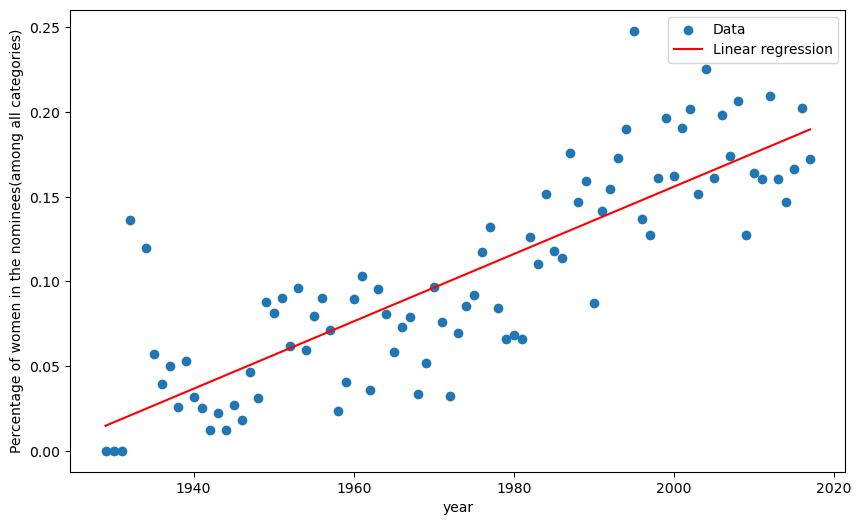

In [ ]:
#plot the linear regression results

plt.figure(figsize=(10,6))
plt.scatter(oscar_nominees_evol.index,oscar_nominees_evol.females/oscar_nominees_evol.total)
plt.plot(oscar_nominees_evol.index, predictions, color='red')
#add a legend
plt.legend(['Data','Linear regression'])
plt.xlabel("year")
plt.ylabel("Percentage of women in the nominees(among all categories)")
plt.show()



## TODO 
> interpréter les coefficients de la regression linéaire, voir s'il faut le faire par catégories 